In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

dates = pd.date_range(start='20230101', periods=100)
values = np.random.randn(100) * 10

values[20] = 50

data = pd.DataFrame({'Date':dates, 'Value':values})

z_scores =stats.zscore(data['Value'])
threshold = 3

print(z_scores)

0     1.541214
1    -0.320990
2     0.565865
3     0.820157
4    -1.394102
        ...   
95    0.741471
96    0.825491
97    0.197938
98   -0.543476
99   -1.110300
Name: Value, Length: 100, dtype: float64


In [4]:
outliers = abs(z_scores) > threshold
print(data[outliers])

         Date  Value
20 2023-01-21   50.0


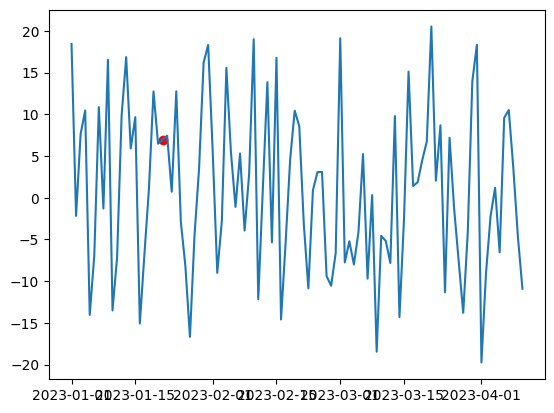

In [6]:
# 이상치에 해당하는 위치의 Value 값을 결측치로 처리
data.loc[outliers, 'Value'] = np.nan
# 결측치로 처리되어서 비어있는 해당 위치를 보간
data['Value'] = data['Value'].interpolate()

plt.plot(data['Date'], data['Value'])
plt.scatter(data[outliers]['Date'], data[outliers]['Value'], color='red')
plt.show()